In [1]:
import pandas_ods_reader as pds
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as sc
import statsmodels.api as sm
import numpy as np

In [2]:
df=pds.read_ods("dataset1_part2.ods",1)

In [3]:
print(df.head())

          date    price    date_exc     pr1           D1       P1      date_y  \
0   29-03-2016  17370.0  29-03-2016  681.42   29-03-2016  17370.0  29-03-2016   
1   30-03-2016  16970.0  30-03-2016  672.75   30-03-2016  16970.0  30-03-2016   
2   31-03-2016  16875.0  31-03-2016  670.40   31-03-2016  16875.0  31-03-2016   
3   01-04-2016  16800.0  01-04-2016  670.70   01-04-2016  16800.0  01-04-2016   
4   04-04-2016  16700.0  04-04-2016  672.70   04-04-2016  16700.0  04-04-2016   

      pr2           D2       P2  
0  6.5066   29-03-2016  17370.0  
1  6.4650   30-03-2016  16970.0  
2  6.4490   31-03-2016  16875.0  
3  6.4786   01-04-2016  16800.0  
4  6.4786   04-04-2016  16700.0  


preparing independent variable

In [4]:
xn=list(df["pr1"])[:-1]
x1n=xn[:-1]            
print(len(xn))
x2n=xn[1:]             

1128


In [5]:
xl1n=list(np.log(x1n))
xl2n=list(np.log(x2n))

In [6]:
xdl=[]
lexl1n=len(xl1n)
for i in range(lexl1n):
    xdl.append(xl2n[i]-xl1n[i])
print(len(xdl))    #del ln

1127


In [7]:
x=[]
for i in range(1126):
    x.append(xdl[i+1]+xdl[i])  #p[t-1]+p[t-2]
len(x)    

1126

preparing dependent variable

In [8]:
yn=list(df["P1"][2:])     #clp(t-1)+clp(t-2)
yl=list(np.log(yn))
leny=len(yn)
print(leny)

1127


In [9]:
yout,y=[],0
rem={}
leny=leny-1
for i in range(leny):
    y=yl[i+1]-yl[i]
    yout.append(y)
    rem[i]=[y,yl[i]]
len(yout)

1126

In [13]:
xstd,ystd=sc.tstd(x,ddof=1),sc.tstd(yout,ddof=1)
xm,ym=np.mean(x),np.mean(yout)

x=sc.zscore(x,axis=0,ddof=2)
y=sc.zscore(yout,axis=0,ddof=2)
test_random=[i for i in range(1126)]
x=[round(i,3) for i in x]
y=[round(i,3) for i in y]


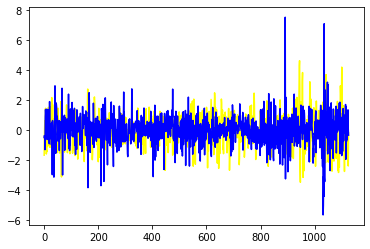

In [14]:
plt.plot(x,color="yellow")
plt.plot(y,color="blue")
plt.show()

In [15]:
x_tr,x_te,y_tr,y_te=train_test_split(x,test_random,random_state=5,test_size=0.3)

In [16]:
x_tr=np.array(x_tr)
y_tr=np.array([y[i] for i in y_tr])
print(len(x_tr),len(y_tr))
model=sm.OLS(x_tr.reshape(-1,1),y_tr).fit()
print(model.summary())

788 788
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              7.145
Date:                Sat, 01 Aug 2020   Prob (F-statistic):                     0.00767
Time:                        20:50:21   Log-Likelihood:                         -1131.3
No. Observations:                 788   AIC:                                      2265.
Df Residuals:                     787   BIC:                                      2269.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [17]:
pre=model.predict(x_te)
pre=list(pre)

In [18]:
#actual result
y_test=[yout[i] for i in y_te]

In [19]:
def z_inv(l):
    r=[i*(ystd-2)+ym for i in l]
    return r

In [20]:
pre_z_inv=z_inv(pre)
len(pre_z_inv)

338

del inverse

In [27]:
def del_inv(l):
    yn_1=[rem[i][1] for i in y_te]
    ylog_predicted=[yn_1[i]+l[i] for i in range(338)]
    return ylog_predicted

In [28]:
pre_z_del_inv=del_inv(pre_z_inv)

In [29]:
def log_inv(l):
    r=[np.exp(i) for i in l]
    return r

In [30]:
act_pre=log_inv(pre_z_del_inv)

In [31]:
np.sqrt(sk.metrics.mean_squared_error(y_test,act_pre))

19589.814888641333

In [32]:
sc.pearsonr(act_pre,x_te)[0]**2

0.7800985644063014

In [33]:
sc.pearsonr(y_tr,x_tr)[0]**2

0.008966528846264142